In [2]:
from tensorflow.keras.datasets import fashion_mnist

(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

4423680/4422102 [==============================] - 387s 87us/step


In [32]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
%matplotlib inline
import seaborn as sns

In [4]:
x_train.shape

(60000, 28, 28)

In [5]:
x_test.shape

(10000, 28, 28)

In [6]:
single_value = x_train[1]

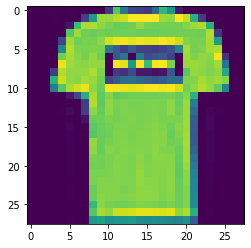

In [7]:
plt.imshow(single_value)

In [8]:
x_train = x_train/255
x_test = x_test/255

In [9]:
x_train = x_train.reshape(60000,28,28,1)
x_test = x_test.reshape(10000,28,28,1)

In [11]:
from tensorflow.keras.utils import to_categorical

In [12]:
y_train = to_categorical(y_train,10)

In [13]:
y_cat_test = to_categorical(y_test,10)

In [14]:
x_train.shape

(60000, 28, 28, 1)

In [15]:
from tensorflow.keras.layers import Dense,Flatten,MaxPool2D,Conv2D
from tensorflow.keras.models import Sequential

In [46]:
model = Sequential()

#CNN
model.add(Conv2D(filters=32, kernel_size=(4,4),input_shape=(28, 28, 1), activation='relu',))
model.add(MaxPool2D(pool_size=(2,2)))

model.add(Flatten())

#ANN
model.add(Dense(128,activation='relu'))
model.add(Dense(10,activation='softmax'))

#Complie
model.compile(optimizer='rmsprop',loss='categorical_crossentropy',metrics=['accuracy'])

In [47]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_7 (Conv2D)            (None, 25, 25, 32)        544       
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 12, 12, 32)        0         
_________________________________________________________________
flatten_4 (Flatten)          (None, 4608)              0         
_________________________________________________________________
dense_8 (Dense)              (None, 128)               589952    
_________________________________________________________________
dense_9 (Dense)              (None, 10)                1290      
Total params: 591,786
Trainable params: 591,786
Non-trainable params: 0
_________________________________________________________________


In [48]:
model.fit(x_train,y_train,
          epochs=10)

Epoch 1/10
1875/1875 [==============================] - 53s 28ms/step - loss: 0.3916 - accuracy: 0.8614
Epoch 2/10
1875/1875 [==============================] - 54s 29ms/step - loss: 0.2733 - accuracy: 0.9017
Epoch 3/10
1875/1875 [==============================] - 48s 26ms/step - loss: 0.2370 - accuracy: 0.9150
Epoch 4/10
1875/1875 [==============================] - 45s 24ms/step - loss: 0.2134 - accuracy: 0.9233
Epoch 5/10
1875/1875 [==============================] - 49s 26ms/step - loss: 0.1948 - accuracy: 0.9307
Epoch 6/10
1875/1875 [==============================] - 50s 27ms/step - loss: 0.1802 - accuracy: 0.9353
Epoch 7/10
1875/1875 [==============================] - 45s 24ms/step - loss: 0.1677 - accuracy: 0.9413
Epoch 8/10
1875/1875 [==============================] - 49s 26ms/step - loss: 0.1574 - accuracy: 0.9448
Epoch 9/10
1875/1875 [==============================] - 53s 28ms/step - loss: 0.1480 - accuracy: 0.9474
Epoch 10/10
1875/1875 [==============================] - 50s 26m

In [49]:
predictions = model.predict_classes(x_test)

In [50]:
from sklearn.metrics import confusion_matrix,classification_report
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.85      0.87      0.86      1000
           1       1.00      0.97      0.98      1000
           2       0.81      0.89      0.85      1000
           3       0.93      0.90      0.91      1000
           4       0.82      0.87      0.84      1000
           5       0.98      0.97      0.97      1000
           6       0.79      0.70      0.74      1000
           7       0.92      0.98      0.95      1000
           8       0.98      0.98      0.98      1000
           9       0.98      0.93      0.96      1000

    accuracy                           0.91     10000
   macro avg       0.91      0.91      0.91     10000
weighted avg       0.91      0.91      0.91     10000



In [51]:
cm = confusion_matrix(y_test, predictions)
cm

array([[868,   0,  25,   8,   8,   2,  85,   0,   4,   0],
       [  2, 970,   0,  17,   3,   1,   4,   0,   3,   0],
       [ 11,   0, 890,   6,  58,   0,  34,   0,   1,   0],
       [ 20,   2,  17, 898,  43,   0,  20,   0,   0,   0],
       [  1,   0,  70,  21, 870,   1,  36,   0,   1,   0],
       [  0,   0,   0,   0,   0, 969,   0,  22,   0,   9],
       [112,   0,  88,  19,  75,   0, 696,   0,  10,   0],
       [  0,   0,   0,   0,   0,   7,   0, 985,   0,   8],
       [  4,   1,   3,   1,   5,   3,   4,   2, 977,   0],
       [  0,   0,   0,   0,   0,   8,   0,  57,   1, 934]], dtype=int64)

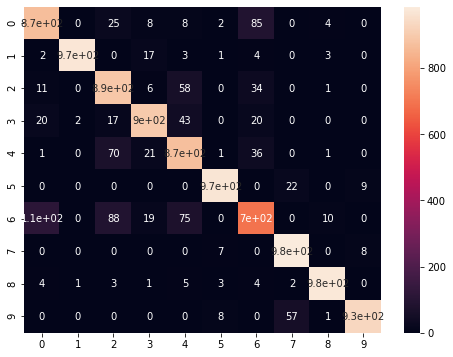

In [52]:
plt.figure(figsize=(8,6))
sns.heatmap(cm,annot=True)

Image label is:  7


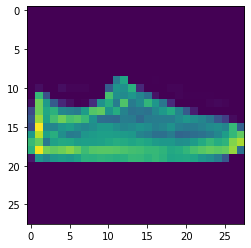

In [53]:
i = 12
print("Image label is: ", predictions[i])
plt.imshow(x_test[i][:,:,0])

In [75]:
import random
def predict():
    insert = random.randint(0,10000)
    print(insert)
    result = predictions[i]
    if result == 0:
    
        print("It is a T-shirt/top")
        plt.imshow(x_test[i][:,:,0])
    
    elif result == 1:
    
        print("It is a Trouser")
        plt.imshow(x_test[i][:,:,0])
    
    elif result == 2:
    
        print("It is a Pullover")
        plt.imshow(x_test[i][:,:,0])
    
    elif result == 3:
    
        print("It is a Dress")
        plt.imshow(x_test[i][:,:,0])
    
    elif result == 4:
    
        print("It is a Coat")
        plt.imshow(x_test[i][:,:,0])
    
    elif result == 5:
    
        print("It is a Sandal")
        plt.imshow(x_test[i][:,:,0])
    
    elif result == 6:
    
        print("It is a Shirt")
        plt.imshow(x_test[i][:,:,0])
    
    elif result == 7:
    
        print("It is a Sneaker")
        plt.imshow(x_test[i][:,:,0])
    
    elif result == 8:
    
        print("It is a Bag")
        plt.imshow(x_test[i][:,:,0])
    
    else:
    
        print("It is a Ankle boot")
        plt.imshow(x_test[i][:,:,0])
    

5804
It is a Dress


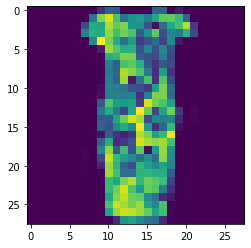

In [76]:
predict()

6055
It is a Shirt


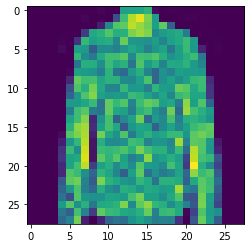

In [87]:
predict()

2617
It is a Coat


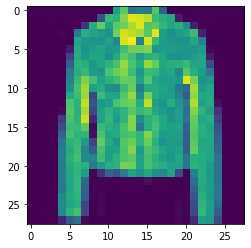

In [89]:
predict()